In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, recall_score, f1_score, accuracy_score

Generate single molecule spectra for model training

In [2]:
k = np.arange(900, 1800, 5)

In [3]:
a=[]

for i in range(100):
    a.append( norm.pdf( k, loc=1000+(np.random.rand()-0.5)*50, scale=10+(np.random.rand()-0.5)*2 )*(1+(np.random.rand()-0.5)*2*0.1) ) 

A = pd.DataFrame(np.column_stack((k, *a)))

In [4]:
b=[]

for i in range(100):
    b.append( norm.pdf( k, loc=1400+(np.random.rand()-0.5)*50, scale=10+(np.random.rand()-0.5)*2 )*(2+(np.random.rand()-0.5)*2*0.1) ) 

B = pd.DataFrame(np.column_stack((k, *b)))

In [5]:
c=[]

for i in range(100):
    c.append( norm.pdf( k, loc=1700+(np.random.rand()-0.5)*50, scale=10+(np.random.rand()-0.5)*2 )*(3+(np.random.rand()-0.5)*2*0.1) ) 

C = pd.DataFrame(np.column_stack((k, *c)))

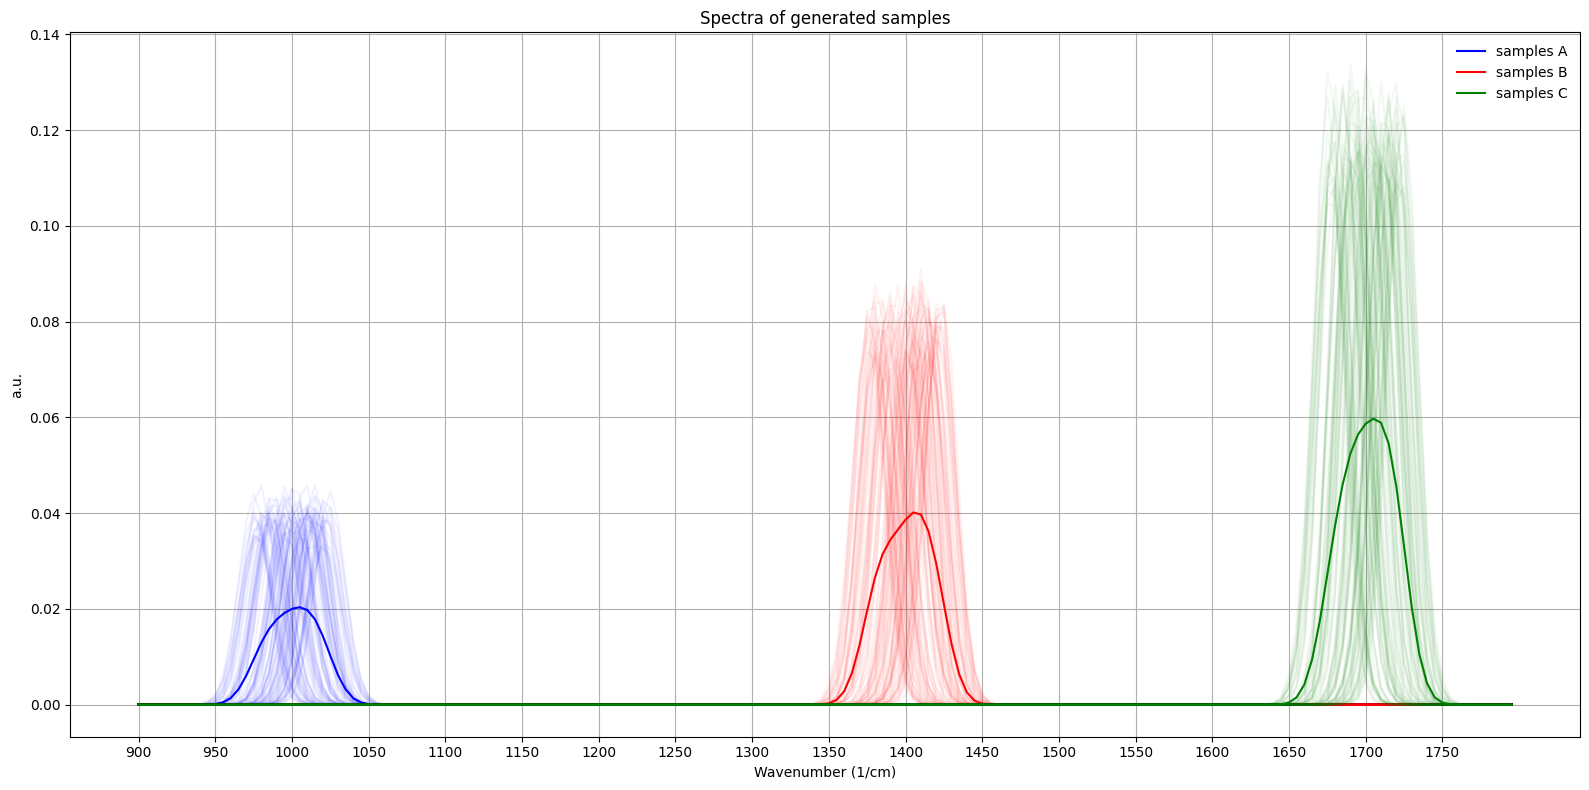

In [6]:
fig, ax = plt.subplots(figsize=[16, 8])


sample_measurement = []
A_plot = pd.melt(A, [0])
for sample, measurement in A_plot.groupby('variable'):
    sample_measurement.append(measurement.reset_index()["value"])
    measurement.reset_index()["value"].plot(alpha=0.05, ax=ax, label="_no_legend_", color="blue")
    plt.xticks(ticks=np.arange(0, 180, 10), labels=np.arange(900, 1800, 50))

pd.concat(sample_measurement, axis=1).mean(axis=1).plot(
    ax=ax, color="blue", label="samples A", legend=True
)
###
sample_measurement = []
B_plot = pd.melt(B, [0])
for sample, measurement in B_plot.groupby('variable'):
    sample_measurement.append(measurement.reset_index()["value"])
    measurement.reset_index()["value"].plot(alpha=0.05, ax=ax, label="_no_legend_", color="red")
    plt.xticks(ticks=np.arange(0, 180, 10), labels=np.arange(900, 1800, 50))

pd.concat(sample_measurement, axis=1).mean(axis=1).plot(
    ax=ax, color="red", label="samples B", legend=True
)
###
sample_measurement = []
C_plot = pd.melt(C, [0])
for sample, measurement in C_plot.groupby('variable'):
    sample_measurement.append(measurement.reset_index()["value"])
    measurement.reset_index()["value"].plot(alpha=0.05, ax=ax, label="_no_legend_", color="green")
    plt.xticks(ticks=np.arange(0, 180, 10), labels=np.arange(900, 1800, 50))

pd.concat(sample_measurement, axis=1).mean(axis=1).plot(
    ax=ax, color="green", label="samples C", legend=True
)

ax.grid()

ax.set_ylabel("a.u.")
ax.set_title("Spectra of generated samples")
ax.set_xlabel("Wavenumber (1/cm)")
ax.legend(loc="upper right", frameon=False)

plt.tight_layout()

In [7]:
A = A.set_index([0])
A.index.names = ['Wavenumbers']
A.columns = ['A_'+str(col) for col in A.columns]

B = B.set_index([0])
B.index.names = ['Wavenumbers']
B.columns = ['B_'+str(col) for col in B.columns]

C = C.set_index([0])
C.index.names = ['Wavenumbers']
C.columns = ['C_'+str(col) for col in C.columns]

df0 = pd.concat([A,B,C], axis=1)

In [8]:
df0

,A_1,A_2,A_3,A_4,A_5,A_6,A_7,A_8,A_9,A_10,...,C_91,C_92,C_93,C_94,C_95,C_96,C_97,C_98,C_99,C_100
Wavenumbers,,,,,,,,,,,,,,,,,,,,,
900.0,9.335642e-19,3.400341e-26,4.731552e-13,4.418356e-24,4.096347e-27,1.240382e-28,5.238076e-26,8.220101e-30,1.842166e-29,1.344450e-33,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
905.0,7.392940e-17,4.268540e-24,1.113271e-11,8.162068e-22,1.013293e-24,1.700691e-26,6.923354e-24,1.371272e-27,2.864721e-27,6.876480e-31,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
910.0,4.491144e-15,4.297190e-22,2.117459e-10,1.134739e-19,1.900809e-22,1.894963e-24,7.292451e-22,1.845772e-25,3.607709e-25,2.657581e-28,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
915.0,2.092973e-13,3.469271e-20,3.255716e-09,1.187266e-17,2.704001e-20,1.715860e-22,6.121287e-20,2.004661e-23,3.679393e-23,7.760786e-26,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
920.0,7.482332e-12,2.246159e-18,4.046646e-08,9.348808e-16,2.917025e-18,1.262607e-20,4.094719e-18,1.756759e-21,3.038901e-21,1.712473e-23,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1775.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.331655e-14,3.609328e-08,8.659306e-14,8.696451e-12,3.440670e-09,5.281324e-11,5.374426e-14,2.418556e-20,4.254260e-10,6.579441e-14
1780.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.104633e-15,2.604629e-09,1.369884e-15,2.507563e-13,1.364833e-10,1.228785e-12,1.242644e-15,1.221524e-22,1.758473e-11,1.174613e-15
1785.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.256971e-17,1.518946e-10,1.627730e-17,5.626826e-15,4.115895e-12,2.114682e-14,2.272873e-17,4.545333e-25,5.707339e-13,1.604439e-17


In [9]:
labels_train = pd.DataFrame(df0.columns).rename(columns={0:'sample'})
labels_train.loc[labels_train['sample'].str.contains('A'),'target'] = 'A'
labels_train.loc[labels_train['sample'].str.contains('B'),'target'] = 'B'
labels_train.loc[labels_train['sample'].str.contains('C'),'target'] = 'C'
labels_train = labels_train.set_index('sample')
labels_train


,target
sample,
A_1,A
A_2,A
A_3,A
A_4,A
A_5,A
...,...
C_96,C
C_97,C
C_98,C


Generate mixed molecule spectra for testing the model

In [10]:
F=[]
abc=[]

for i in range(100):
    Fa=(1+(np.random.rand()-0.5)*2*1)
    Fb=(2+(np.random.rand()-0.5)*2*2)
    Fc=(3+(np.random.rand()-0.5)*2*3)

    

    abc.append( norm.pdf( k, loc=1000+(np.random.rand()-0.5)*50, scale=10+(np.random.rand()-0.5)*2 )*Fa + \
                norm.pdf( k, loc=1400+(np.random.rand()-0.5)*50, scale=10+(np.random.rand()-0.5)*2 )*Fb + \
                norm.pdf( k, loc=1700+(np.random.rand()-0.5)*50, scale=10+(np.random.rand()-0.5)*2 )*Fc)

    F.append([Fa/1.,Fb/2.,Fc/3.])
    
    

In [11]:
ABC = pd.DataFrame(np.column_stack((k, *abc))).set_index([0])
ABC.index.names = ['Wavenumbers']
ABC.columns = ['ABC_'+str(col) for col in ABC.columns]

In [12]:
ABC

,ABC_1,ABC_2,ABC_3,ABC_4,ABC_5,ABC_6,ABC_7,ABC_8,ABC_9,ABC_10,...,ABC_91,ABC_92,ABC_93,ABC_94,ABC_95,ABC_96,ABC_97,ABC_98,ABC_99,ABC_100
Wavenumbers,,,,,,,,,,,,,,,,,,,,,
900.0,2.589508e-37,2.046128e-15,6.759232e-23,1.746313e-34,4.700345e-31,1.612389e-32,1.337411e-33,1.131981e-21,2.056041e-30,2.850836e-24,...,6.583306e-24,1.910514e-22,2.135441e-21,3.573330e-23,2.877411e-22,1.476807e-22,1.368797e-28,1.836940e-26,9.043464e-37,9.814025e-15
905.0,1.543311e-34,6.376091e-14,1.022345e-20,7.323233e-32,1.273455e-28,4.041070e-30,6.394952e-31,8.897940e-20,3.799766e-28,2.621090e-22,...,8.906028e-22,3.165791e-20,1.387891e-19,3.446450e-21,3.228645e-20,1.318057e-20,2.149696e-26,2.892931e-24,5.465859e-34,2.856406e-13
910.0,7.044311e-32,1.612344e-12,1.173990e-18,2.383981e-29,2.700067e-26,8.076377e-28,2.328528e-28,5.612947e-18,5.654803e-26,1.953445e-20,...,9.369880e-20,3.891356e-18,7.326346e-18,2.658254e-19,2.813504e-18,9.362666e-19,2.696415e-24,3.590593e-22,2.526519e-31,6.603438e-12
915.0,2.462479e-29,3.308583e-11,1.023524e-16,6.024514e-27,4.480254e-24,1.287154e-25,6.456505e-26,2.841473e-16,6.776626e-24,1.180130e-18,...,7.666445e-18,3.548184e-16,3.141113e-16,1.639633e-17,1.904073e-16,5.293213e-17,2.701270e-22,3.512202e-20,8.931554e-29,1.212544e-10
920.0,6.592583e-27,5.509445e-10,6.774828e-15,1.181845e-24,5.817920e-22,1.635830e-23,1.363280e-23,1.154377e-14,6.539506e-22,5.779205e-17,...,4.878250e-16,2.399927e-14,1.093815e-14,8.087647e-16,1.000757e-14,2.381737e-15,2.161329e-20,2.707558e-18,2.414749e-26,1.768489e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1775.0,4.742092e-11,5.199305e-19,9.209345e-13,8.644618e-21,2.750538e-13,2.237038e-14,8.545280e-07,2.726319e-16,1.557522e-11,7.378586e-13,...,2.349734e-18,1.130097e-07,1.144014e-15,6.327657e-17,2.008909e-23,5.162686e-12,8.867454e-10,8.057147e-22,4.653495e-09,9.847927e-16
1780.0,1.400372e-12,4.718293e-21,2.940351e-14,6.520915e-23,1.098753e-14,5.182994e-16,8.000266e-08,5.871294e-18,3.441957e-13,1.232103e-14,...,2.663474e-20,8.724809e-09,1.651185e-17,7.028026e-19,9.299991e-26,1.213900e-13,3.450797e-11,4.076787e-24,2.181630e-10,2.379565e-17
1785.0,3.143362e-14,3.266674e-23,7.520856e-16,3.795121e-25,3.553266e-16,9.601077e-18,6.017918e-09,1.027337e-19,5.681301e-15,1.518702e-16,...,2.359354e-22,5.296531e-10,1.838669e-19,5.978871e-21,3.274174e-28,2.182671e-15,1.038366e-12,1.516857e-26,7.961750e-12,4.640847e-19


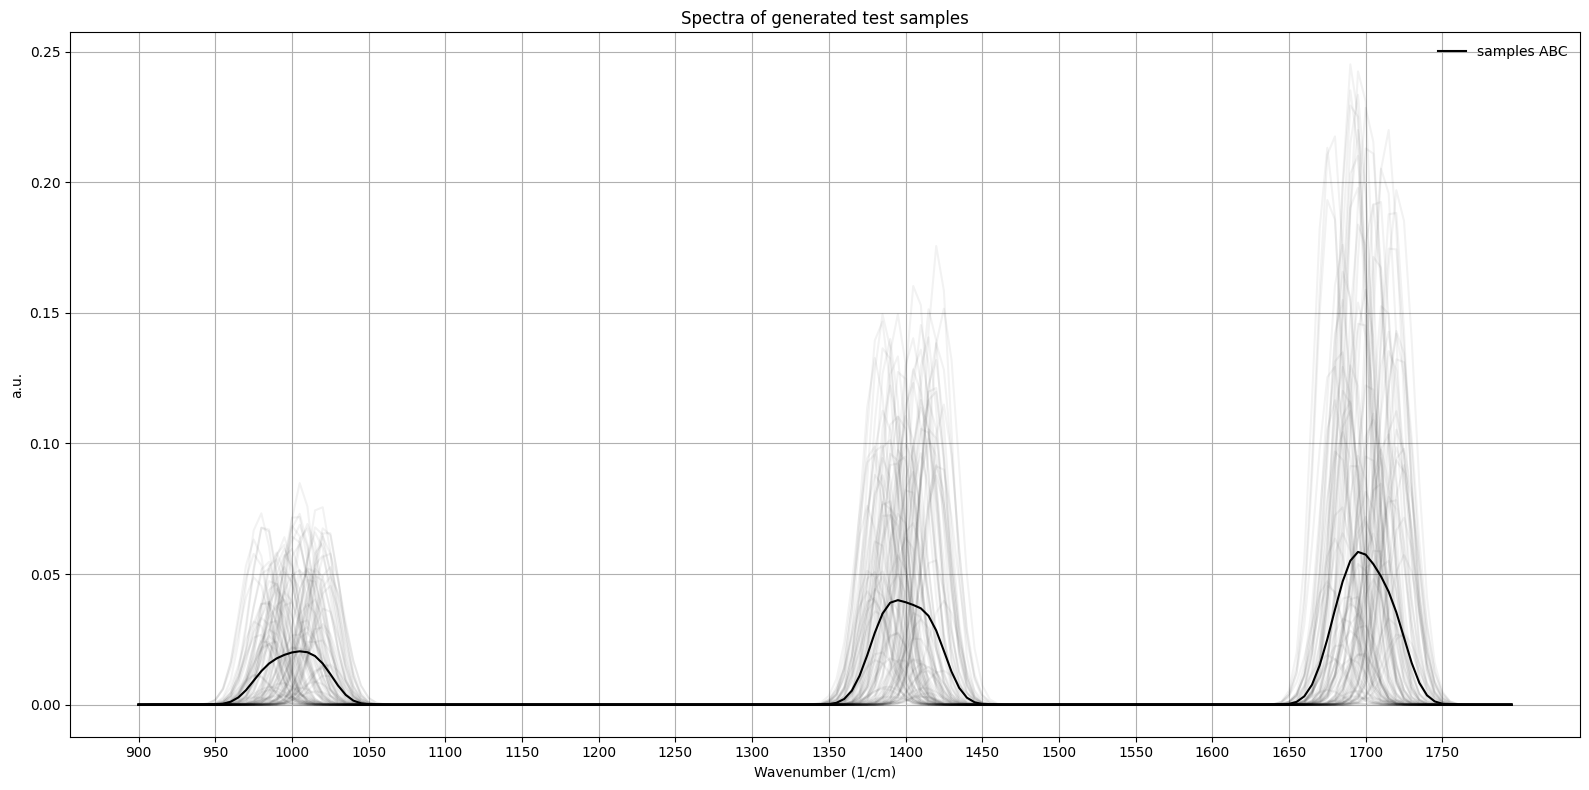

In [13]:
fig, ax = plt.subplots(figsize=[16, 8])


sample_measurement = []
ABC_plot = pd.melt(ABC.reset_index(), ['Wavenumbers'])
for sample, measurement in ABC_plot.groupby('variable'):
    sample_measurement.append(measurement.reset_index()["value"])
    measurement.reset_index()["value"].plot(alpha=0.05, ax=ax, label="_no_legend_", color="black")
    plt.xticks(ticks=np.arange(0, 180, 10), labels=np.arange(900, 1800, 50))

pd.concat(sample_measurement, axis=1).mean(axis=1).plot(
    ax=ax, color="black", label="samples ABC", legend=True
)

ax.grid()

ax.set_ylabel("a.u.")
ax.set_title("Spectra of generated test samples")
ax.set_xlabel("Wavenumber (1/cm)")
ax.legend(loc="upper right", frameon=False)

plt.tight_layout()

In [14]:
df1=ABC.copy()

In [15]:
labels = pd.DataFrame(F).rename(columns={0:'A', 1:'B', 2:'C'})
labels.index = ['ABC_'+str(row+1) for row in labels.index]
labels

,A,B,C
ABC_1,0.276058,0.088757,0.446574
ABC_2,0.635226,0.213441,0.228017
ABC_3,1.477857,0.960180,0.621544
ABC_4,1.707000,0.173461,0.629136
ABC_5,1.266442,1.574357,0.023344
...,...,...,...
ABC_96,0.581084,0.609909,1.600618
ABC_97,0.233028,0.416194,1.178289
ABC_98,1.341430,1.271050,0.024664
ABC_99,0.907065,1.972760,1.140915


Now we have:

+ the single molecule spectra `df0` 
+ the mixed molecule spectra `df1`
+ `labels` with the mixing ratios of the mixed molecule spectra



### Next step: 
Find an ML model that determines the right molecular mixing ratios from the mixed molecule spectra. 

In [16]:
X_train = df0.copy().T
X_test = df1.copy().T
y_train=labels_train.copy()

In [17]:
model = LogisticRegression()
model.fit(X_train, y_train)


/home/karol/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [18]:
y_pred = model.predict_proba(X_test)

sample_num = 20

In [19]:
y_pred[sample_num]

array([0.07440744, 0.0620456 , 0.86354696])

In [20]:
indiv_heights = [df0.filter(like='A_').max().mean(), 
                 df0.filter(like='B_').max().mean(), 
                 df0.filter(like='C_').max().mean()]
indiv_heights = np.array(indiv_heights)

predicted_heights = y_pred[sample_num]*indiv_heights

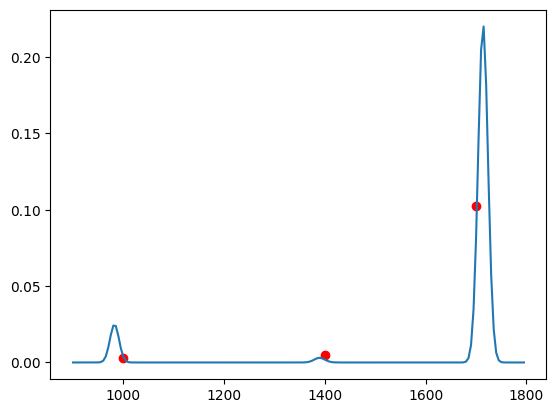

In [21]:
k = list(df0.index.unique())
plt.plot(k, np.array(X_test)[sample_num])
plt.scatter([1000,1400,1700], predicted_heights, color='red')
plt.show()

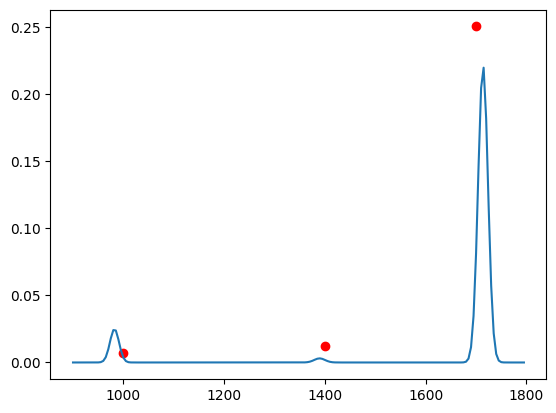

In [22]:
plt.plot(k, np.array(X_test)[sample_num])
plt.scatter([1000,1400,1700], predicted_heights*2.45, color='red')
plt.show()

Logistic regression as actually a good start

### Testing a CNN

In [23]:
# importing the required modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Conv2D, Dense, MaxPooling1D, MaxPooling2D, Activation, Flatten, BatchNormalization, Dropout

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np

from tensorflow.keras.optimizers import Adam

2024-02-08 15:48:08.190396: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-08 15:48:08.190513: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-08 15:48:08.191959: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-08 15:48:08.199447: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-08 15:48:09.683060: W tensorflow/compiler/tf2

In [24]:
xtrain = np.array(df0.T)
xtrain = xtrain.reshape(300,180,1)

xtest = np.array(df1.T)
xtest = xtest.reshape(100,180,1)

ytrain = np.array(labels_train)
mapping = {'A': 0, 'B': 1, 'C': 2}
ytrain = to_categorical(np.asarray([mapping[x[0]] for x in ytrain]).astype(int))


ytest = np.array(labels)

In [50]:
from tensorflow.keras import backend as K
K.clear_session() 
model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(180, 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  

])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [55]:
model.fit(xtrain, ytrain, epochs=200, batch_size=128,validation_split=0.3, verbose=0)

In [56]:
pred = model.predict(xtest)

4/4 [==============================] - 0s 4ms/step


In [57]:
sample_num = 77



indiv_heights = [df0.filter(like='A_').max().mean(), 
                 df0.filter(like='B_').max().mean(), 
                 df0.filter(like='C_').max().mean()]
indiv_heights = np.array(indiv_heights)

predicted_heights = pred[sample_num]*indiv_heights


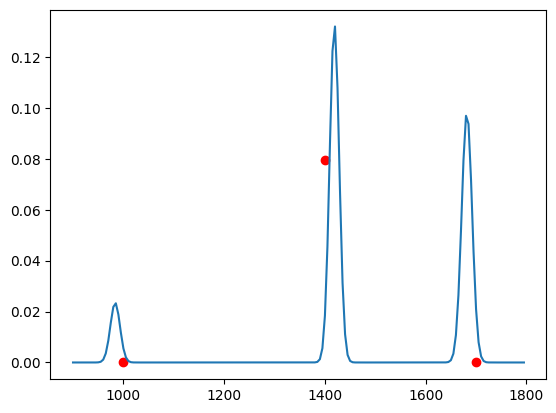

In [58]:
k = list(df0.index.unique())
plt.plot(k, np.array(xtest)[sample_num])
plt.scatter([1000,1400,1700], predicted_heights, color='red')
plt.show()

problems: Imbalanced data, biasing during training